In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score


In [3]:
df = pd.read_csv("diabetes_kaggle_format (1).csv")
print("Shape du dataset :", df.shape)
display(df.head())

Shape du dataset : (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,194,113,54,484,44.3,1.325,50,0
1,14,102,57,3,121,26.6,1.576,65,0
2,10,153,66,23,124,39.3,2.285,33,1
3,7,153,76,33,548,42.0,1.324,25,0
4,6,88,105,29,169,37.9,1.303,45,0


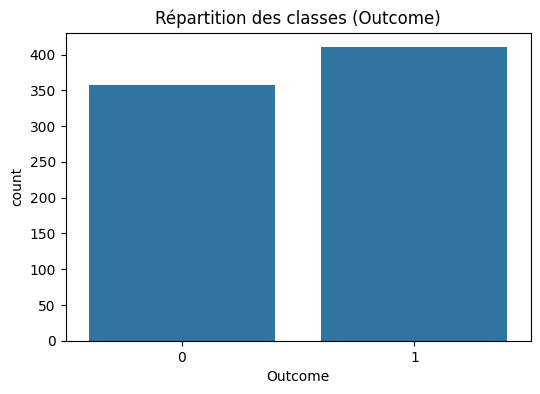

In [4]:
# 2. Visualisation de la cible
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Répartition des classes (Outcome)")
plt.show()

In [5]:
# 3. Remplacement des zéros par NaN
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
print("Valeurs manquantes :\n", df.isnull().sum())

Valeurs manquantes :
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               6
Insulin                     1
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


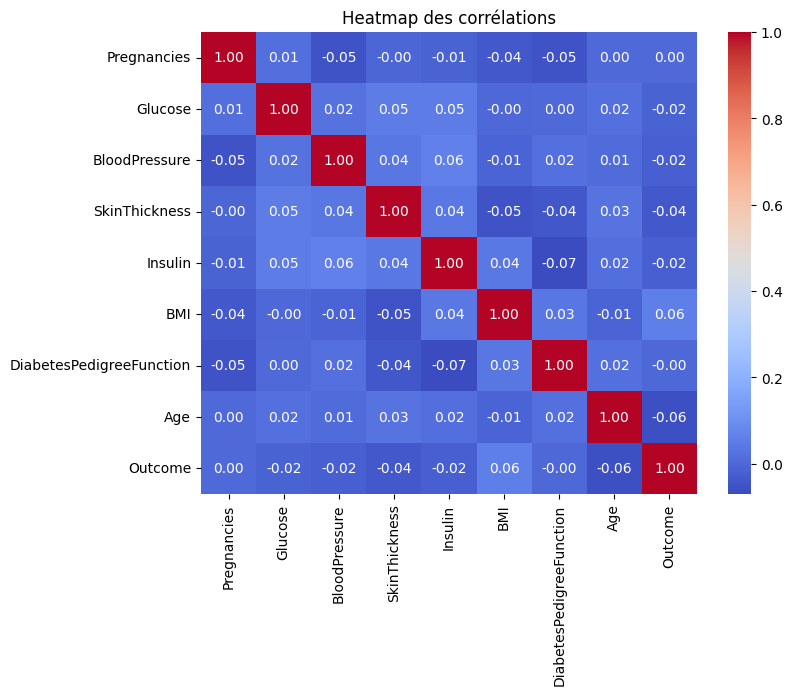

In [6]:
# 4. Corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des corrélations")
plt.show()

In [8]:
# 5. Préparation des données
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train_proc = pipeline.fit_transform(X_train)
X_test_proc = pipeline.transform(X_test)


=== Régression Logistique ===
              precision    recall  f1-score   support

           0       0.36      0.21      0.26        72
           1       0.49      0.67      0.57        82

    accuracy                           0.45       154
   macro avg       0.42      0.44      0.42       154
weighted avg       0.43      0.45      0.42       154



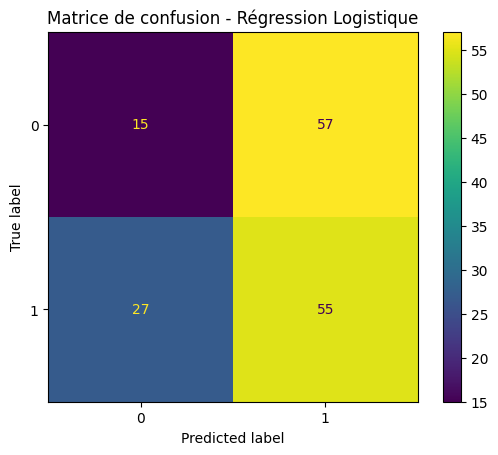


=== KNN (k=5) ===
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        72
           1       0.56      0.60      0.58        82

    accuracy                           0.53       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.53      0.53      0.53       154



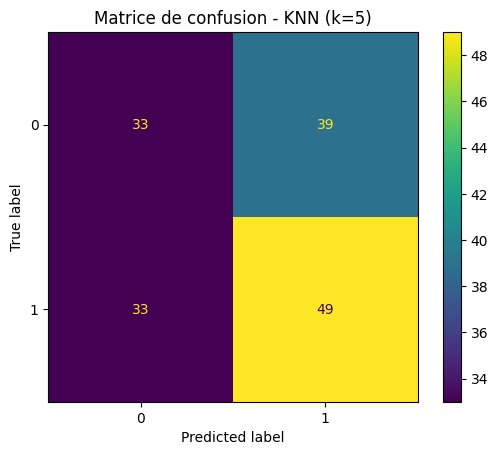

In [9]:
# 6. Entraînement et évaluation
models = {
    "Régression Logistique": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Matrice de confusion - {name}")
    plt.show()

In [10]:
# 7. Validation croisée
print("\n=== Validation croisée (5 folds) ===")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    pipeline_cv = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    scores = cross_val_score(pipeline_cv, X, y, cv=skf, scoring='f1')
    print(f"{name} - F1-score moyen : {scores.mean():.4f}")


=== Validation croisée (5 folds) ===
Régression Logistique - F1-score moyen : 0.5914
KNN (k=5) - F1-score moyen : 0.5576
